## Importing Library And Data

In [1]:
# import the library
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the datasets
airline_data = pd.read_csv("EastWestAirlines.csv")
airline_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Data Cleaning

In [3]:
# data dimenssion check
print('Dimenssion:', airline_data.shape)

Dimenssion: (3999, 12)


- Data have total 39999 Rows and 12 Columns

In [4]:
# check the dataframes information 
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


- All the features have integer values of type int64
- No categorical data is found

In [5]:
# basic data statistics check
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


- ID: Unique ID

- Balance: Number of miles eligible for award travel

- Qual_mile: Number of miles counted as qualifying for Topflight status

- cc1_miles: Number of miles earned with freq. flyer credit card in the past 12 months:

- cc2_miles: Number of miles earned with Rewards credit card in the past 12 months:

- cc3_miles: Number of miles earned with Small Business credit card in the past 12 months:

        1 = under 5,000
        2 = 5,000 - 10,000
        3 = 10,001 - 25,000
        4 = 25,001 - 50,000
        5 = over 50,000

- Bonus_miles: Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans: Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo: Number of flight miles in the past 12 months

- Flight_trans_12: Number of flight transactions in the past 12 months

- Days_since_enrolled: Number of days since enrolled in flier program

- Award: whether that person had award flight (free flight) or not


- Data is not normalize form Balance, Bonus_miles, Qual_miles, Days_since_enroll have the high values as compared to others

In [6]:
# null values check
airline_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

- Total null values count = 0

In [7]:
# dublicate entry check
print('Dublicate entry counts:', airline_data.duplicated().sum())

Dublicate entry counts: 0


- No dublicate data is found
- No null data is found
- No Categorical data is found
- Missing values are 0

## Normalizing Data

In [8]:
# Normalization function
def norm_func(i):
    x = (i - i.min()) / (i.max() - i.min())
    return (x)

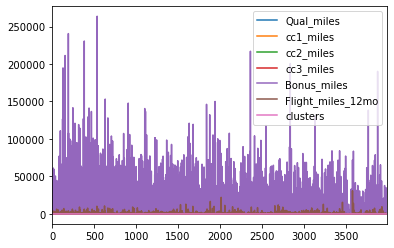

In [39]:
millagess.plot()

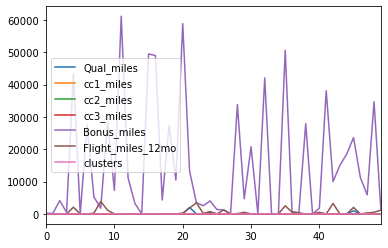

In [43]:
X_50_o = millagess.head(50)
X_50_o.plot()

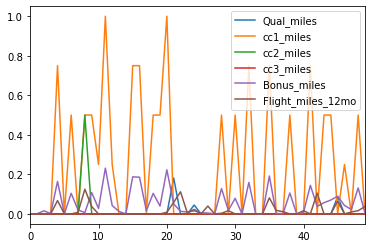

In [41]:
X_50.plot()

In [9]:
# targeting different segments for different types of mileage offers
millagess = airline_data.iloc[:,[2,3,4,5,6,8]]

milage_data_norm = norm_func(millagess)
milage_data_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo
0,0.0,0.00,0.0,0.0,0.000660,0.000000
1,0.0,0.00,0.0,0.0,0.000815,0.000000
2,0.0,0.00,0.0,0.0,0.015636,0.000000
3,0.0,0.00,0.0,0.0,0.001896,0.000000
4,0.0,0.75,0.0,0.0,0.164211,0.067398
...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.006490
3995,0.0,0.00,0.0,0.0,0.003720,0.000000
3996,0.0,0.50,0.0,0.0,0.096505,0.000000
3997,0.0,0.00,0.0,0.0,0.001896,0.016225


# Hirarchical Clustering

In [10]:
X_50 = milage_data_norm.head(50)

- Taking first 50 rows for analysis [Hirarchical Clustering]

## Data Visualization and Explore

- For Hirarchical Cluster, we use dendrogram for data visualization analysis
- Below are the methods for distance calulation and dendrogram picture                
        1) Single
        2) Centrid
        3) Complete
        4) Average
        5) Ward
        
- ward() gives more accurate classified dendrogram

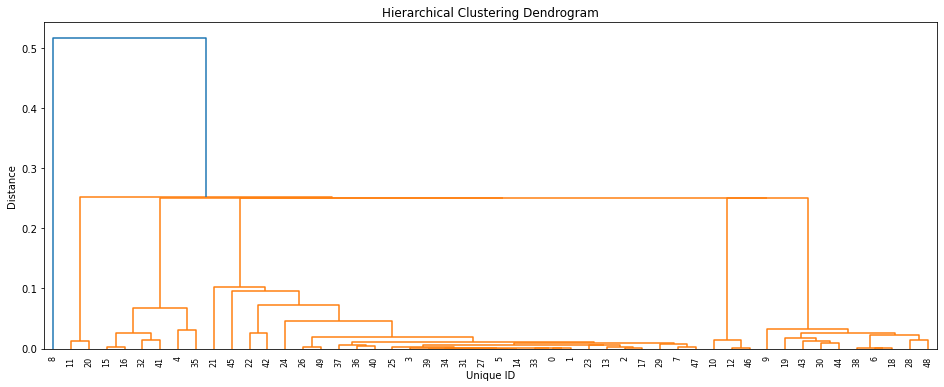

In [11]:
# create dendogram (Single method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Unique ID')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X_50, method = 'single'))
plt.axhline(y = 2, color = 'b', linestyle = '--')
plt.show()

- By using single linkage method, dendrogram structure is divided into 2 parts of section
- Blue (8),Orange (15, 41, 24, 48, etc)
- So, 2 hirarchical clusters are formed depending on similarities in group

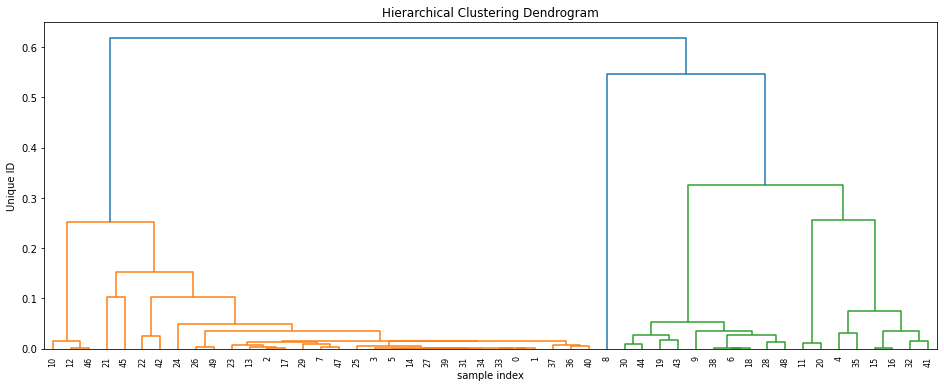

In [12]:
# create dendogram (Centroid method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Unique ID')
dendogram = sch.dendrogram(sch.linkage(X_50, method = 'centroid'))
plt.axhline(y = 3, color = 'b', linestyle = '--')
plt.show()

- By using centroid method, dendrogram structure is divided into 3 parts of section
- Blue (8) and Orange (16, 15, 41, etc)
- So, 2 hirarchical clusters are formed depending on similarities in group

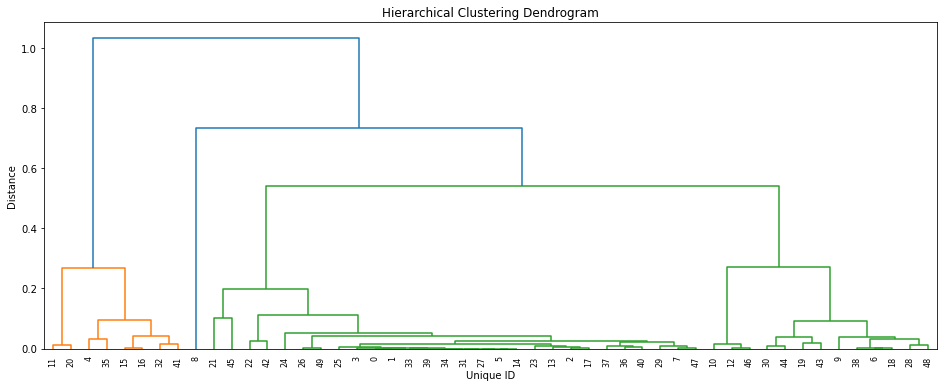

In [13]:
# create dendogram (Complete method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Unique ID')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X_50, method = 'complete'))
plt.axhline(y = 5, color = 'b', linestyle = '--')
plt.show()

- By using complete method, dendrogram structure is divided into 3 parts of section
- Blue (8),  and Orange (16, 15, 41, etc)
- So, 2 hirarchical clusters are formed depending on similarities in group

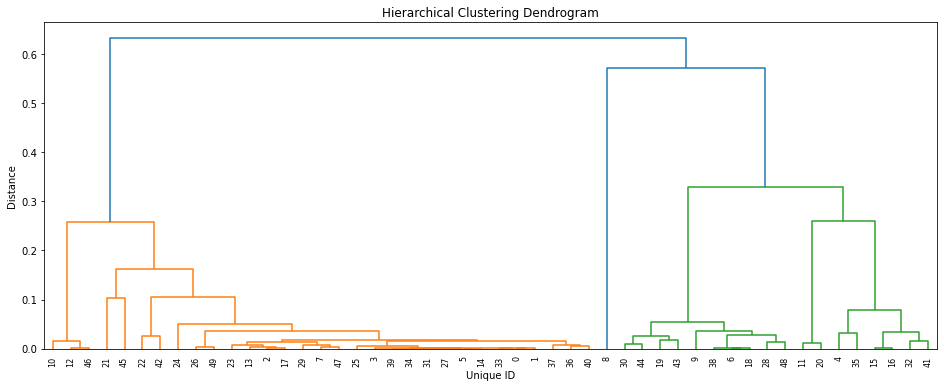

In [14]:
# create dendogram (Average method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Unique ID')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X_50, method = 'average'))
plt.axhline(y = 3.1, color = 'b', linestyle = '--')
plt.show()

- By using average method, dendrogram structure is divided into 3 parts of section
- Blue (8), Green (30, 44, 19, etc),  and Orange (16, 15, 41)
- So, 2 hirarchical clusters are formed depending on similarities in group

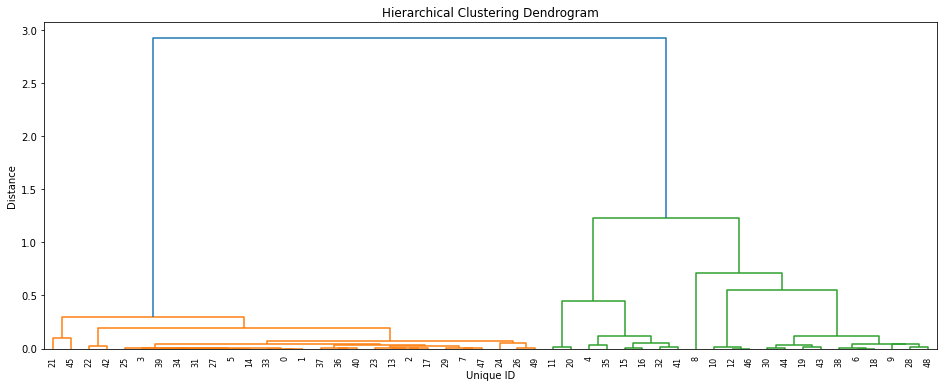

In [15]:
# create dendogram (Ward method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Unique ID')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(X_50, method = 'ward'))
plt.axhline(y = 8.5, color = 'b', linestyle = '--')
plt.axhline(y = 6, color = 'orange', linestyle = '--')
plt.axhline(y = 4.5, color = 'g', linestyle = '--')
plt.show()

- By using ward method, dendrogram structure is divided into 3 parts of section
- Blue (8), Green (30, 11, 9, etc) and Orange (34, 5, 2, 47, etc)
- So, 3 hirarchical clusters are formed depending on similarities in group of 3 different colors

### Training the Hirarchical Clustering Model

In [16]:
# hc = hirarchical clustering
hirarchical_cluster = AgglomerativeClustering(n_clusters = 3, linkage='ward', affinity = "euclidean")
hirarchical_cluster.fit(milage_data_norm)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

- Cluster size = 3
- Linkage method = ward
- Distance calulation = euclidean


- And we are fitting the cluster model to "hirarchical_cluster"

In [17]:
# cluster labels (check unique values)
hc_cluster_labels = pd.Series(hirarchical_cluster.labels_)
hc_cluster_labels.unique()

array([0, 1, 2], dtype=int64)

- There are 3 cluster having the labels naming as 0, 1, 2
- 0 refers Cluster 1
- 1 refers Cluster 2
- 2 refers Cluster 3

In [18]:
# create a new column for cluster id "clusterId" and assign labels
airline_data['clusterId'] = hc_cluster_labels 
airline_data1 = airline_data.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
airline_data1.head(15)

,clusterId,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,0,6,16420,0,1,1,1,0,0,0,0,6942,0
6,2,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,0,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,0,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,2,10,104860,0,3,1,1,28426,28,1150,3,6931,1


- 1st column "ClusterId" is append in loded datasets for analyzing the which record is belongs to which cluster

In [19]:
# writing csv file with cluster id
airline_data1.to_csv("AirlineClusterData.csv", encoding = "utf-8")

- Write a csv file containing original dataset with Cluster Id

In [20]:
# for visualization purpose
milage_data_norm['clusterId'] = hc_cluster_labels 
scaled_data1 = milage_data_norm.iloc[:, [0,1,2,3,4,5]]

In [21]:
milage_data_norm.head()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo,clusterId
0,0.0,0.00,0.0,0.0,0.000660,0.000000,0
1,0.0,0.00,0.0,0.0,0.000815,0.000000,0
2,0.0,0.00,0.0,0.0,0.015636,0.000000,0
3,0.0,0.00,0.0,0.0,0.001896,0.000000,0
4,0.0,0.75,0.0,0.0,0.164211,0.067398,1


In [22]:
# predict the cluster values
y_hc = hirarchical_cluster.fit_predict(milage_data_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

## Visualizing The Clusters

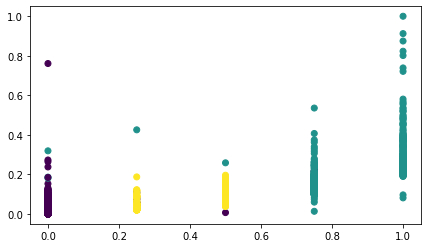

In [23]:
# visualization of scatter plot
plt.figure(figsize = (7,4))
plt.scatter(milage_data_norm['cc1_miles'], milage_data_norm['Bonus_miles'], c = hc_cluster_labels)

- From above scatter plot (cc1_miles vs Bonus_miles), we are seeing that the datapoints are scatter among the 3 clusters having  the cluster similarities

# K-Means Clustering

In [24]:
# import the KMeans library
from sklearn.cluster import KMeans

## Calculation of Ineria And Centroid

In [25]:
# calculation of inertia
wscc=[]
for i in range (1,11):
    # fit the K-Means algorith to our data
    kmeans=KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(milage_data_norm)
    
    # Computer the cluster sum of squares and append to WSCC list (with respect to Inertia)
    wscc.append(kmeans.inertia_)

- KMeans args

        1) max_iter : maximum number of iteration there can to be find the final clusters when KMeans algorithm is running
        2) n_init   : the number of times the KMeans algorithm will be run with different initial centroids


## Elbow Curve

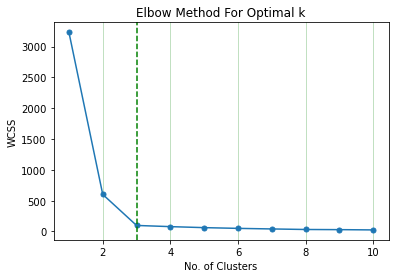

In [26]:
# Visualising elbow method
plt.plot(range(1,11), wscc, marker = 'o', markersize = 5)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.axvline(x = 3, color = 'g', linestyle = '--')
plt.grid(which = 'both', color = 'g', axis = 'x', alpha = 0.3)
plt.show()

- Using elbow method to find the optimal number of clusters
- Elbow curve is smooth after the 3 almost
- Hence, number of optimal clusters = 3

In [27]:
# creating object kmeans of class KMeans()
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)

- Computing the KMeans by providing number of clusters = 4 (n_clusters)
- From Elbow method, 4 is the number that we had analysed 

In [28]:
# predicting the cluster values (labels)
y_kmeans = kmeans.fit_predict(milage_data_norm)
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
y_kmeans.astype

<function ndarray.astype>

In [30]:
# converting x into ndarray to avoid errors
X1 = np.array(milage_data_norm)
X1.astype

<function ndarray.astype>

In [31]:
# Centers of the cluster
print(kmeans.cluster_centers_)

[[ 1.43369905e-02  1.95567145e-03  1.26032160e-02  1.08648414e-04
   1.50596801e-02  1.51190277e-02 -1.74305015e-14]
 [ 3.53180583e-03  4.22857143e-01  7.63278329e-17 -6.46184495e-17
   6.49088247e-02  8.99255049e-03  2.00000000e+00]
 [ 1.89755552e-02  8.32017011e-01  7.28583860e-17  1.45808019e-02
   2.04821574e-01  2.07074719e-02  1.00000000e+00]]


- Center of the clusters

In [32]:
# this will tell us to which cluster down the data observations belongs to
new_label = kmeans.labels_
print(new_label)

[0 0 0 ... 1 0 0]


In [33]:
# New list called cluster
cluster = list(y_kmeans)

# Adding cluster to our data set
millagess['clusters'] = cluster
millagess.head(10)

<ipython-input-33-bd1035c1db21>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millagess['clusters'] = cluster


,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo,clusters
0,0,1,1,1,174,0,0
1,0,1,1,1,215,0,0
2,0,1,1,1,4123,0,0
3,0,1,1,1,500,0,0
4,0,4,1,1,43300,2077,2
5,0,1,1,1,0,0,0
6,0,3,1,1,27482,0,1
7,0,1,1,1,5250,250,0
8,0,3,2,1,1753,3850,0
9,0,3,1,1,28426,1150,1


In [34]:
# mean of clusters 0 to 3
kmeans_mean_cluster = pd.DataFrame(round(millagess.groupby('clusters').mean(), 1))
kmeans_mean_cluster

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Flight_miles_12mo
clusters,,,,,,
0,159.8,1.0,1.0,1.0,3971.0,465.9
1,39.4,2.7,1.0,1.0,17115.5,277.1
2,211.5,4.3,1.0,1.1,54008.4,638.1


## Visualizing the Clusters

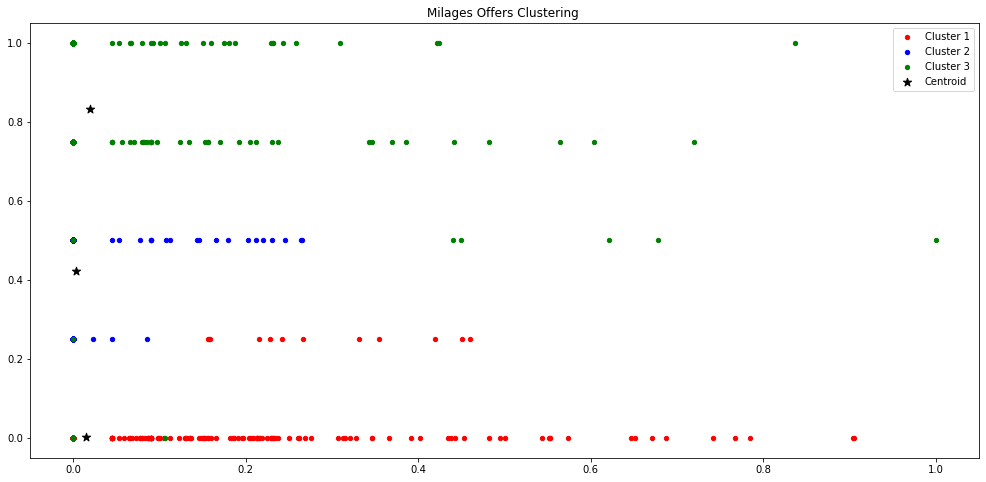

In [35]:
# scatter plot for cluster values 0, 1, 2, 3
fig = plt.figure(figsize=(17, 8))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 75, c = 'red', marker='.', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 75, c = 'blue', marker='.', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 75, c = 'green', marker='.',label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 75, color='black', marker='*',label='Centroid')
plt.title('Milages Offers Clustering ')
plt.legend()
plt.show()

- Predicting the cluster labels and plot the above scatter plot having 4 different clusters
- Cluster 1 (red), Cluster 1 (blue), Cluster 1 (green) and Centroid (black)
- Circular points refers to the datapoints within the perticular clusters based on color
- Star points refers to the centroid for that clusters which is indicated in black color

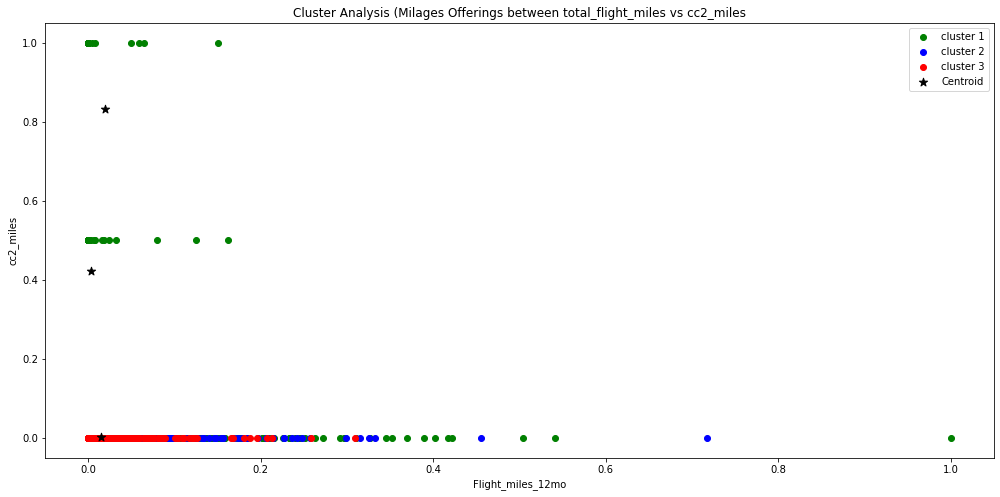

In [36]:
# scatter plot for "Flight_miles_12mo" and "cc2_miles"
fig = plt.figure(figsize=(17, 8))

# taking all datapoints into df1, df2, df3 respectivelly which belongs to cluster id = 0, 1. 2
df1 = milage_data_norm[milage_data_norm.clusterId == 0]
df2 = milage_data_norm[milage_data_norm.clusterId == 1]
df3 = milage_data_norm[milage_data_norm.clusterId == 2]

# plot the scatter doagram between individual two features with centroid
plt.scatter(df1.Flight_miles_12mo,df1['cc2_miles'],color='g', label='cluster 1')
plt.scatter(df2.Flight_miles_12mo,df2['cc2_miles'],color='b', label='cluster 2')
plt.scatter(df3.Flight_miles_12mo,df3['cc2_miles'],color='r', label='cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 75, color='black', marker='*', label='Centroid')

plt.title('Cluster Analysis (Milages Offerings between total_flight_miles vs cc2_miles')
plt.xlabel('Flight_miles_12mo')
plt.ylabel('cc2_miles')
plt.legend()

- Scatter plot between two individual values "Flight_miles_12mo" and "cc2_miles"
- df1 = data_scaled[data_scaled.clusterId == 0]
        
        datapoints having cluster label is 0 refers to the df1 and plotting scatter plot of df1 